# *Step 1: Exploratory Data Analysis (EDA)* #

## Section 1.1 : Understand the Dataset ##

In [1]:
# Import essential libraries
import pandas as pd

# Load the Airbnb dataset
df = pd.read_csv("airbnb.csv")  



In [2]:
# Display structure and basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles      

In [3]:
# Display the first 5 rows to understand what the data looks like
print("\n First 5 Records:\n")
print(df.head())




 First 5 Records:

   Unnamed: 0        id                                               name  \
0           0  49849504                                     Perla bungalov   
1           1  50891766  Authentic Beach Architect Sheltered Villa with...   
2           2  50699164                                  cottages sataplia   
3           3  49871422                        Sapanca Breathable Bungalow   
4           4  51245886                                      Bungalov Ev 2   

  rating reviews    host_name      host_id                   address  \
0   4.71      64    Mehmetcan  357334205.0  Kartepe, Kocaeli, Turkey   
1    New       0        Fatih  386223873.0      Kaş, Antalya, Turkey   
2   4.85      68       Giorgi  409690853.0          Imereti, Georgia   
3    5.0      13        Melih  401873242.0  Sapanca, Sakarya, Turkey   
4    New       0  Arp Sapanca  414884116.0  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 

In [4]:
# Check for missing values in each column
print("\n Missing Values:\n")
print(df.isnull().sum())




 Missing Values:

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64


In [5]:
# View the data types of each column
print("\n Data Types:\n")
print(df.dtypes)




 Data Types:

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object


In [6]:
# Show summary statistics of numerical columns
print("\n Summary Statistics:\n")
print(df.describe())


 Summary Statistics:

         Unnamed: 0            id       host_id         price     bathrooms  \
count  12805.000000  1.280500e+04  1.280500e+04  1.280500e+04  12805.000000   
mean    6402.000000  7.525187e+16  1.638192e+08  1.769780e+04      1.874424   
std     3696.629433  2.007933e+17  1.413622e+08  4.569364e+04      2.091399   
min        0.000000  1.313100e+04  2.303900e+04  3.930000e+02      0.000000   
25%     3201.000000  2.023958e+07  3.700032e+07  3.994000e+03      1.000000   
50%     6402.000000  3.682229e+07  1.256459e+08  8.175000e+03      1.000000   
75%     9603.000000  4.999760e+07  2.639623e+08  1.606200e+04      2.000000   
max    12804.000000  7.017905e+17  4.758973e+08  1.907963e+06     50.000000   

               beds        guests        toiles      bedrooms       studios  
count  12805.000000  12805.000000  12805.000000  12805.000000  12805.000000  
mean       3.316751      5.213745      0.019211      2.136041      0.023585  
std        4.037791      3.8088

In [7]:
# Summary of text-based features to be used in ANN
text_features = ['features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links']
print("\nUnique Value Count in Text Features:")
print(df[text_features].nunique())

print("\nAverage Length of Each Text Feature:")
print(df[text_features].applymap(lambda x: len(str(x))).mean())


Unique Value Count in Text Features:
features         2548
amenities       11630
safety_rules      257
hourse_rules     5800
img_links       12711
dtype: int64

Average Length of Each Text Feature:
features         38.442093
amenities       190.530418
safety_rules    141.479656
hourse_rules    101.003046
img_links       603.823038
dtype: float64


## Section 1.2: Distribution Analysis of Numerical Columns ##

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
# Convert rating and reviews to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Numerical columns for distribution analysis
numerical_cols = ['price', 'rating', 'reviews', 'bathrooms', 'bedrooms', 'guests', 'beds']



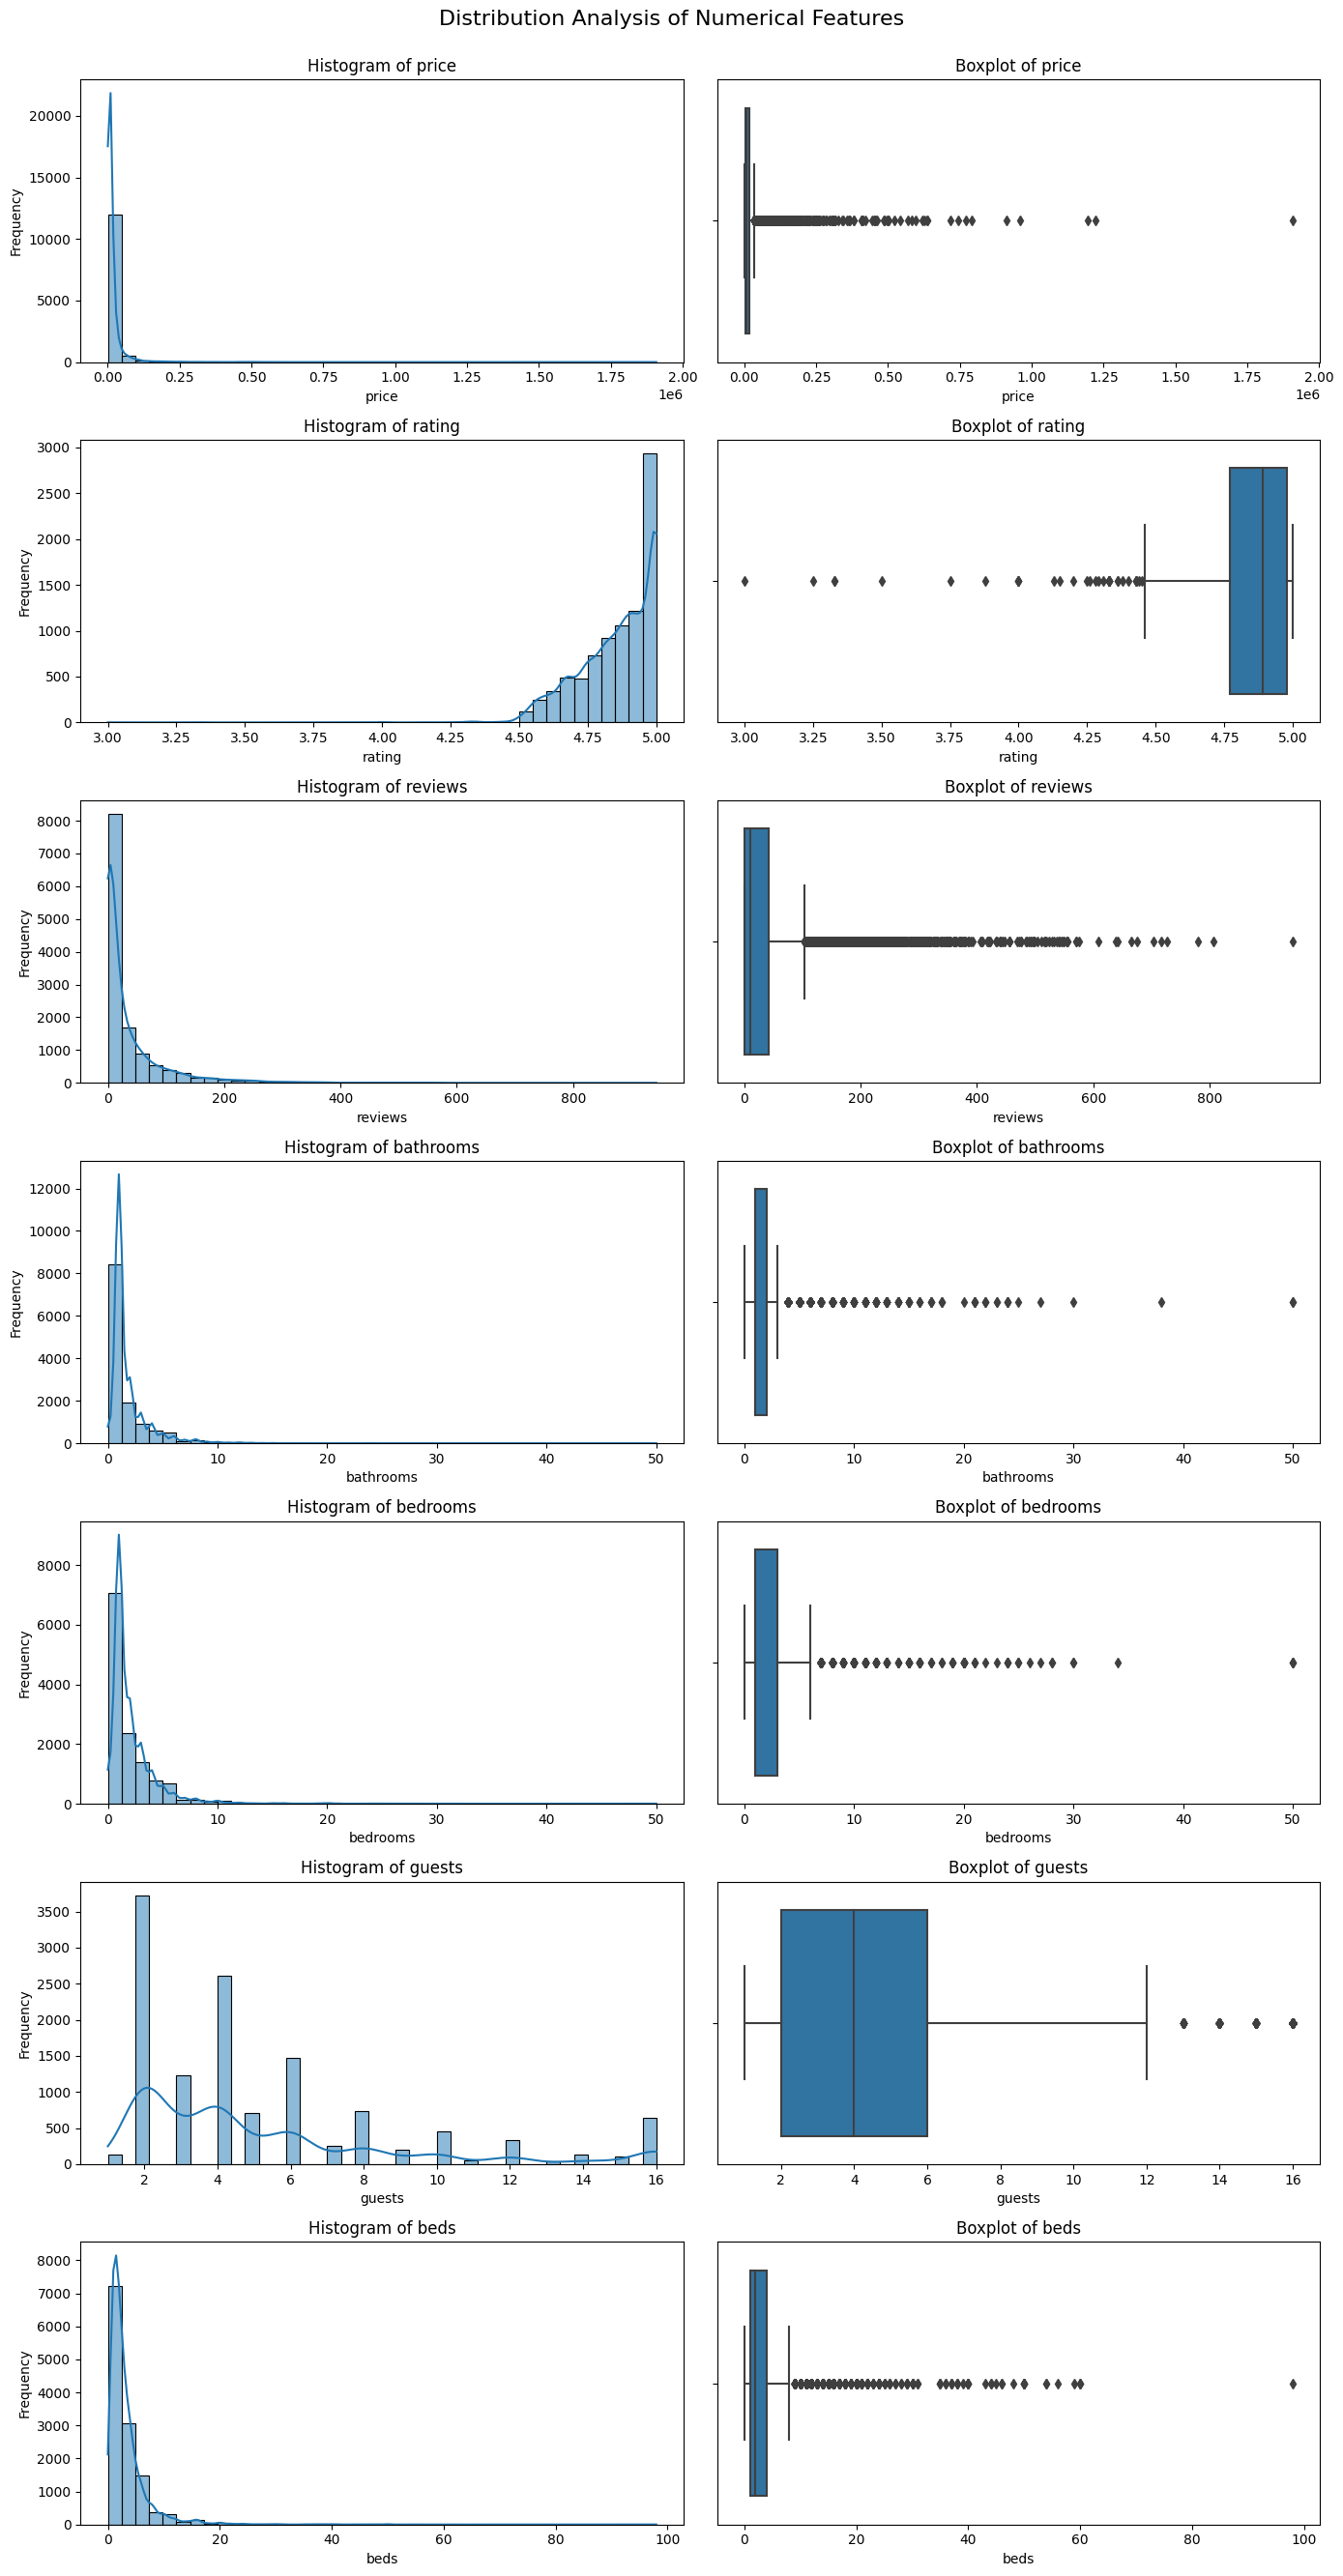

In [10]:
# Set up the figure for histogram and boxplot side by side
fig, axs = plt.subplots(len(numerical_cols), 2, figsize=(14, 28))
fig.suptitle("Distribution Analysis of Numerical Features", fontsize=16)

# Loop through each numerical column and plot both histogram and boxplot
for i, col in enumerate(numerical_cols):
    # Histogram with KDE (Kernel Density Estimation)
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i, 0], bins=40)
    axs[i, 0].set_title(f'Histogram of {col}', fontsize=12)
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel("Frequency")
    
    # Boxplot to identify outliers
    sns.boxplot(x=df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {col}', fontsize=12)
    axs[i, 1].set_xlabel(col)

# Improve spacing between plots
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


## Section 1.3 – Correlation Analysis   ##

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


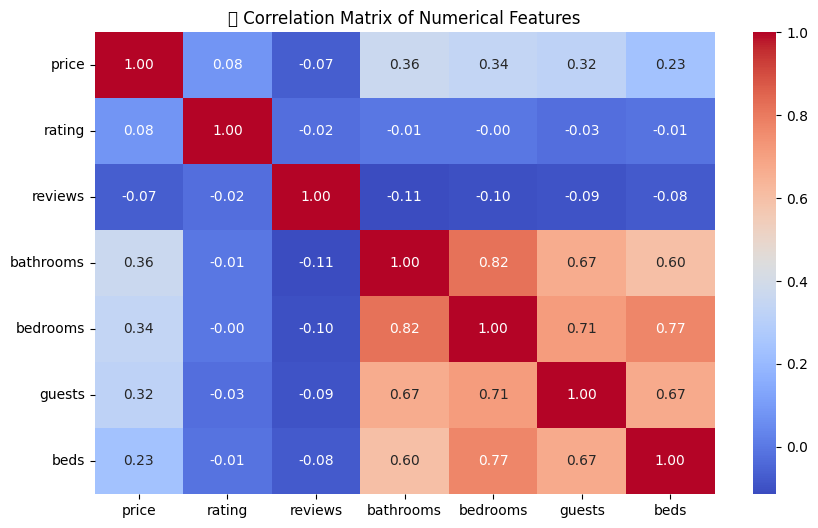

In [11]:
# Correlation matrix of cleaned numeric columns
corr_cols = ['price', 'rating', 'reviews', 'bathrooms', 'bedrooms', 'guests', 'beds']
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix of Numerical Features")
plt.show()


## Section 1.4 – Analyze Categorical & Textual Features   ##

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


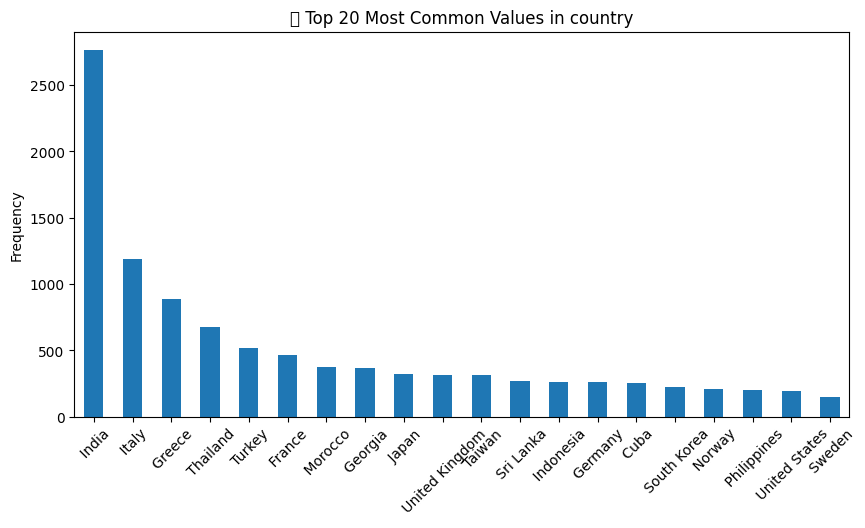

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


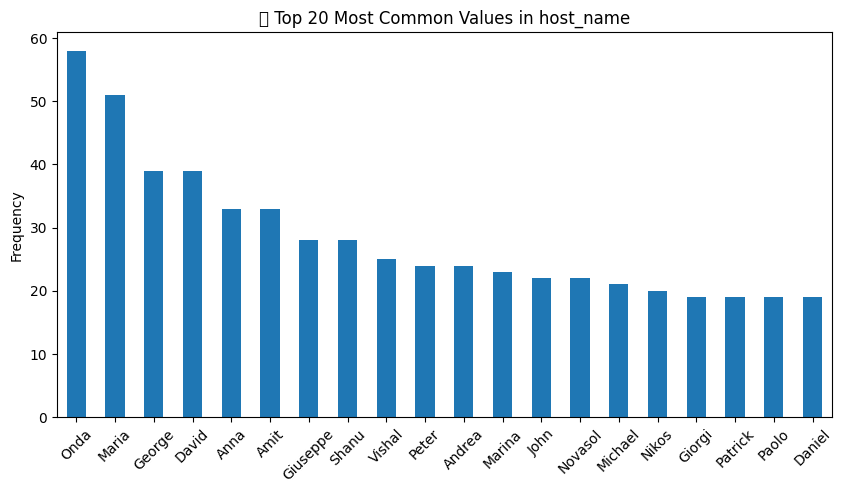

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


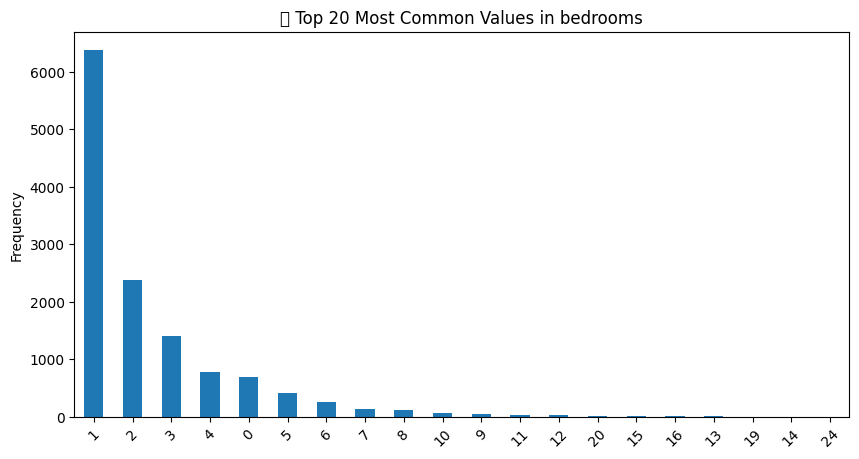

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


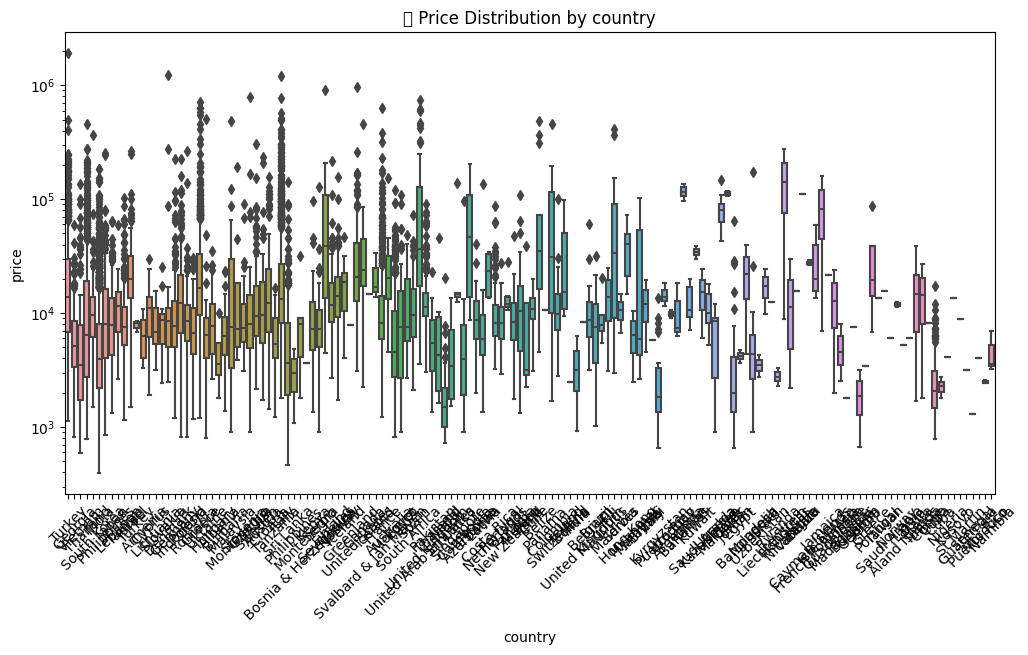

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


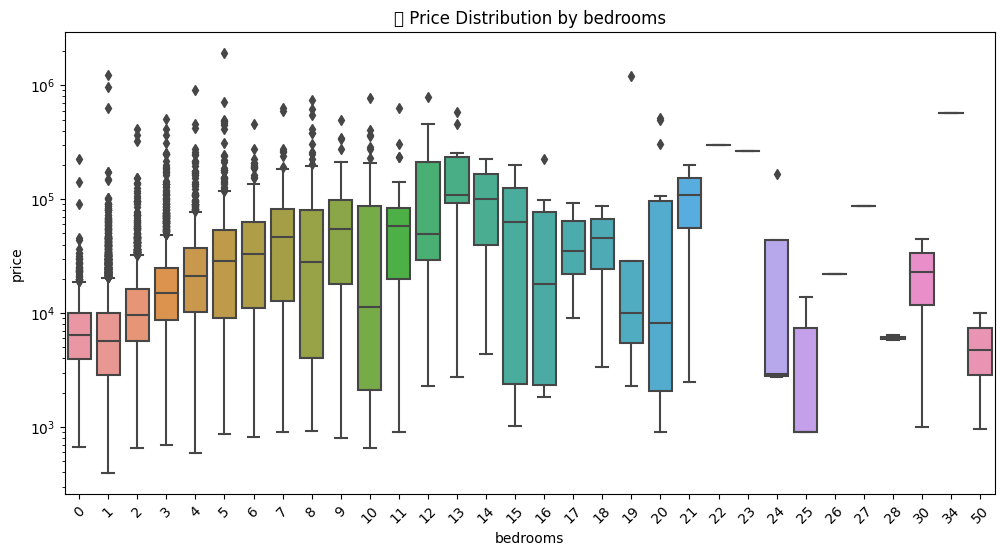

🔍 Sample of 'amenities' and 'features':

                                          features  \
10192      10 guests,4 bedrooms,5 beds,3 bathrooms   
12413  2 guests,1 bedroom,1 bed,1 private bathroom   
1358           2 guests,1 bedroom,1 bed,1 bathroom   
6595          2 guests,1 bedroom,1 bed,2 bathrooms   
7458       5 guests,1 bedroom,3 beds,1.5 bathrooms   

                                               amenities  
10192  Golf course view,Waterfront,Kitchen,Wifi,Free ...  
12413  Wifi,Free parking on premises,Pets allowed,Smo...  
1358   Kitchen,Free parking on premises,Patio or balc...  
6595   Lake access,Kitchen,Wifi,Dedicated workspace,F...  
7458   City skyline view,Mountain view,Public or shar...  


In [12]:
# Categorical fields to analyze
cat_cols = ['country', 'host_name', 'bedrooms']

# Plot distribution of each categorical feature
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'🧾 Top 20 Most Common Values in {col}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Relationship with price: boxplots
for col in ['country', 'bedrooms']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'💰 Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.yscale('log')  # to handle skewed price
    plt.show()

# Example previews of text features
print("🔍 Sample of 'amenities' and 'features':\n")
print(df[['features', 'amenities']].sample(5, random_state=42))


In [13]:
print ("\n🔍 Sample of 'safety_rules' and 'house_rules':\n")


🔍 Sample of 'safety_rules' and 'house_rules':

